In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('sal.csv')
experience = np.array(df['experience'].values).reshape(-1,1)
salary = np.array(df['salary'].values).reshape(-1,1)

In [82]:
print(sum(df['salary']))
print(len(salary))
print(len(experience))

51.6
12
12


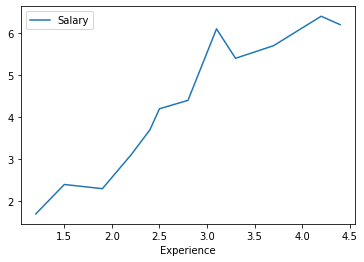

In [74]:
plt.plot(experience,salary,label='Salary')
plt.xlabel('Experience')

plt.legend()

In [75]:
mean_y = np.mean(salary)
mean_x = np.mean(experience)

b0 = 0
b1 = 0

for i in experience :
    for j in salary :
        b1 += ((i-mean_x)*(j-mean_y))/((i-mean_x)*(i-mean_x))
b0 = mean_y - b1*mean_x
print(b0)
print(b1)

[4.3]
[9.23705556e-14]


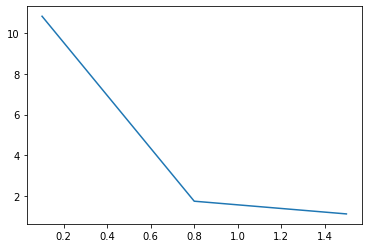

In [76]:
#q1_a
def mse(y,y_pred):
    return np.mean((y_pred-y)**2)

slopes = [0.1,0.8,1.5]
intercept = 1.1
mse_values = []
for slope in slopes:
    y_pred = intercept + slope*experience
    mse_calc = mse(salary,y_pred)
    mse_values.append(mse_calc)
    
plt.plot(slopes,mse_values)

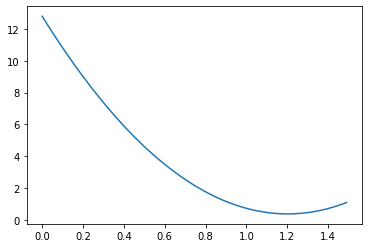

In [77]:
#q1_b
slopes = np.arange(0,1.5,0.01).reshape(-1,1)
intercept = 1.1
mse_values_b = []
for slope in slopes:
    y_pred = intercept + slope*experience
    mse_calc = mse(salary,y_pred)
    mse_values_b.append(mse_calc)

plt.plot(slopes,mse_values_b)

In [131]:
#q1_c
mse_values_c1 = []
mse_values_c2 = []
mse_values_c3 = []

slopes = np.arange(0,1.5,0.01).reshape(-1,1)
intercepts = [1.1,1.2,1.3]
for slope in slopes:
    y_pred = intercepts[0] + slope*experience
    mse_calc = mse(salary,y_pred)
    mse_values_c1.append(mse_calc)
for slope in slopes:
    y_pred = intercepts[1] + slope*experience
    mse_calc = mse(salary,y_pred)
    mse_values_c2.append(mse_calc)
for slope in slopes:
    y_pred = intercepts[2] + slope*experience
    mse_calc = mse(salary,y_pred)
    mse_values_c3.append(mse_calc)
plt.plot(slopes,mse_values_c1)
plt.plot(slopes,mse_values_c2)
plt.plot(slopes,mse_values_c3)

TypeError: 'numpy.float64' object is not callable

In [79]:
#q1_d
model = LinearRegression()
model.fit(experience.reshape(-1, 1), salary)

y_pred_sklearn = model.predict(experience.reshape(-1, 1))
mse_sklearn = mean_squared_error(salary, y_pred_sklearn)

print("MSE using scikit-learn:", mse_sklearn)


MSE using scikit-learn: 0.23366710810280558


# Q2

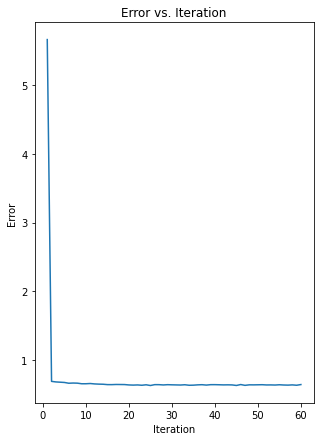

In [125]:
# q2_a
alpha = 0.01  
iterations = 60
epochs = 5
n = len(salary) 

B0 = 0
B1 = 0


errors = []

for iteration in range(iterations):
    total_error = 0
    for _ in range(epochs):
        
        indices = np.random.permutation(n)
        salary_shuffled = salary[indices]
        experience_shuffled = experience[indices]

        for i in range(n):
            
            y_pred = B0 + B1 * experience_shuffled[i]
            
            
            error = y_pred - salary_shuffled[i]
            B0 -= alpha * error
            B1 -= alpha * error * experience_shuffled[i]
            
            
            total_error += (error ** 2) / (2 * n)
    
 
    errors.append(total_error)
errors = np.array(errors)

plt.figure(figsize = (5,7))
plt.plot(range(1, iterations + 1), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.show()


In [126]:
#q2_b
sgd_model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=60 * 5, random_state=0)

sgd_model.fit(experience.reshape(-1, 1), salary)

B0_sgd = sgd_model.intercept_[0]
B1_sgd = sgd_model.coef_[0]

y_pred_sgd = sgd_model.predict(experience.reshape(-1, 1))
mse_sgd = mean_squared_error(salary, y_pred_sgd)

print("Results using scikit-learn SGD:")
print("B0 (Intercept):", B0_sgd)
print("B1 (Slope):", B1_sgd)
print("MSE:", mse_sgd)

Results using scikit-learn SGD:
B0 (Intercept): 0.38321645763324963
B1 (Slope): 1.4243129518448867
MSE: 0.25347797184878296


/home/Student/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


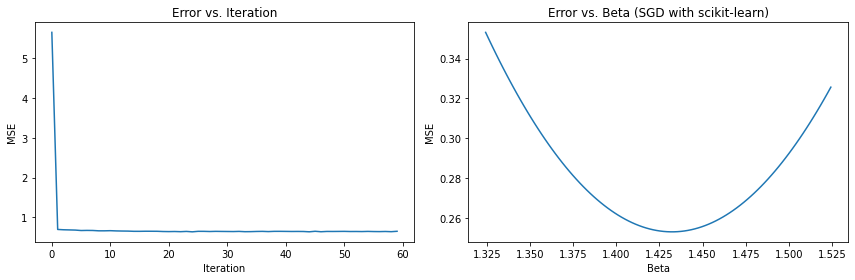

In [128]:
#q2_c
plt.figure(figsize=(12, 4))
plt.subplot(121)
iterations = []
for _ in range(60):
    iterations.append(_)
plt.plot(iterations, errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Error vs. Iteration')

plt.subplot(122)
beta_values_sgd = np.linspace(B1_sgd - 0.1, B1_sgd + 0.1, num=100)
error_values_sgd = []

for beta in beta_values_sgd:
    y_pred_sgd = B0_sgd + beta * experience
    mse_sgd = mean_squared_error(salary, y_pred_sgd)
    error_values_sgd.append(mse_sgd)

plt.plot(beta_values_sgd, error_values_sgd)
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.title('Error vs. Beta (SGD with scikit-learn)')
plt.tight_layout()
plt.show()


# Additional

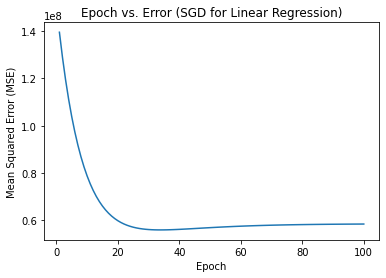

In [124]:

data = pd.read_csv("Salary_Data.csv")

X = data["YearsExperience"].values
y = data["Salary"].values
learning_rate = 0.01 
n_epochs = 100  
errors = []
sgd_model = SGDRegressor(learning_rate="constant", eta0=learning_rate, max_iter=1, random_state=0)

for epoch in range(n_epochs):
    sgd_model.partial_fit(X.reshape(-1, 1), y)
    
    y_pred = sgd_model.predict(X.reshape(-1, 1))
    
    mse = mean_squared_error(y, y_pred)
    errors.append(mse)

plt.plot(range(1, n_epochs + 1), errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Epoch vs. Error (SGD for Linear Regression)')
plt.show()
